The parameters are: lambda 1.4, mu 4.74, nu 38.82, delta 1
the parameters based on moment inference is: [ 1.30140226  2.8333457  28.23531679]
the parameters based on ML:                  [ 1.30507801  2.83987725 28.23514389]
The average of gene-products 8.887,
And theoretically we expect: 8.851465798045602


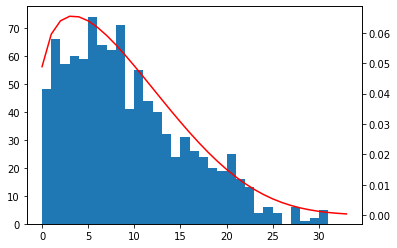

In [7]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp

sys.path.append(os.path.abspath(f"{os.getcwd()}/.."))
from tbk.run import get_products
from tbk.inference import moment_based, maximum_likelihood
from tbk.bp import beta_poisson4_log_likelihood, beta_poisson3, beta_poisson4

lambd = 1.4  # rate from inactive -> active
mu = 4.74    # rate from active -> inactive
nu = 38.82   # rate from active -> product
delta = 1    # rate from product -> degraded

# # generate products through a markovian model (slow)
# with mp.Pool(processes=2) as pool:
#     products = pool.starmap(get_products, [(lambd, mu, nu, delta) for _ in range(2000)])

# generate products through the beta poisson model (fast)
products = beta_poisson3(lambd, mu, nu, size=1000)

# print statistics
print(f'The parameters are: lambda {lambd}, mu {mu}, nu {nu}, delta {delta}')
print(f'the parameters based on moment inference is: {moment_based(np.array(products))}')
print(f'the parameters based on ML:                  '
      f'{maximum_likelihood(np.array(products))}')
print(f"The average of gene-products {np.mean(products)},")
print(f"And theoretically we expect: {((lambd * nu) / ((lambd + mu) * delta))}")

# plot our data
vals = np.array(range(max(products)))
chances = beta_poisson4_log_likelihood(*np.array([*maximum_likelihood(np.array(products)), 1]), 
                                       *np.unique(vals, return_counts=True),
                                       return_sum=False)
fig, ax1 = plt.subplots()

ax1.hist(products[..., np.newaxis], bins=np.arange(max(products[..., np.newaxis])))
ax2 = ax1.twinx()
ax2.plot(chances, c='r')
plt.show()
